<div style="background-color:#000;"><img src="pqn.png"></img></div>

This notebook simulates an asset price path with jumps using a Jump-Diffusion model. The model incorporates both continuous Brownian motion and discrete jumps to capture sudden price changes. The asset price path is generated through a loop, updating the price at each time step based on random components. Parameters such as initial stock price, drift, volatility, jump intensity, and jump size are used to define the simulation. This is useful in practice for modeling asset prices that may experience sudden changes, such as stocks or commodities.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define initial stock price, drift, volatility, and jump parameters for the simulation

In [2]:
S0 = 100  # Initial stock price
mu = 0.05  # Drift
sigma = 0.2  # Volatility
lambda_ = 0.1  # Jump intensity (average number of jumps per year)
mu_j = -0.2  # Mean of the jump size
sigma_j = 0.1  # Standard deviation of the jump size
T = 1  # Time horizon (1 year)
dt = 1/252  # Time step (1 trading day)
N = int(T / dt)  # Number of steps

Seed the random number generator for reproducibility

In [3]:
np.random.seed(42)

Initialize an array to store simulated prices

In [4]:
prices = np.zeros(N)
prices[0] = S0

Simulate the asset price path using a loop to update the price at each time step. Each update incorporates both Brownian motion and potential jumps.

In [5]:
for t in range(1, N):
    # Generate normally distributed random variable for Brownian motion
    Z = np.random.normal(0, 1)
    
    # Determine if a jump occurs and generate the jump size
    J = np.random.normal(mu_j, sigma_j) if np.random.poisson(lambda_ * dt) > 0 else 0
    
    # Update the price using the Jump-Diffusion model formula
    prices[t] = prices[t-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z + J)

Plot the simulated asset price path to visualize the outcome

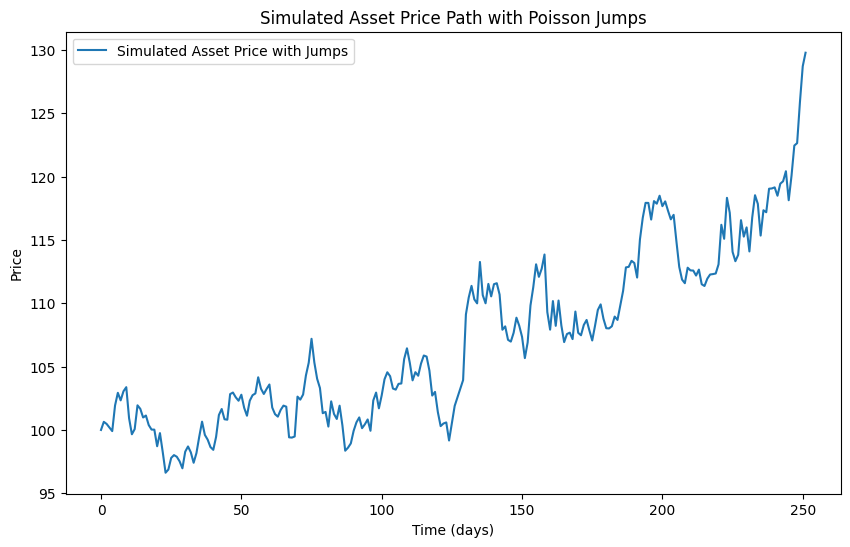

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(prices, label='Simulated Asset Price with Jumps')
plt.xlabel('Time (days)')
plt.ylabel('Price')
plt.title('Simulated Asset Price Path with Poisson Jumps')
plt.legend()
plt.show()

<a href="https://pyquantnews.com/">PyQuant News</a> is where finance practitioners level up with Python for quant finance, algorithmic trading, and market data analysis. Looking to get started? Check out the fastest growing, top-selling course to <a href="https://gettingstartedwithpythonforquantfinance.com/">get started with Python for quant finance</a>. For educational purposes. Not investment advise. Use at your own risk.